# Escogiendo hiperparametros: cross-validation

## Los datos


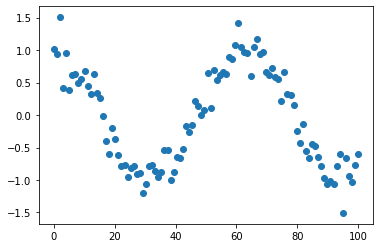

In [0]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

x = np.linspace(0, 100, n)
fx = np.cos(x/10)
y = fx +  np.random.normal(0, 0.2, n)

plt.scatter(x, y)
plt.show()

## Extraccion del test set

Extraemos el 30% de los datos para probar nuestro modelo.

70
30
70
30


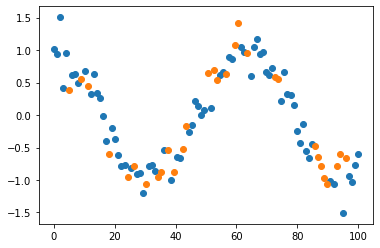

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.show()

## El modelo: smoothing splines

Este modelo encuentra curvas que se ajustan a los datos controlado por una variable de suavizacion.

Preparamos los datos para entrenamiento.

In [0]:
import pandas as pd

data_train = pd.DataFrame({
    "x": x_train,
    "y": y_train
})

data_test = pd.DataFrame({
    "x": x_test,
    "y": y_test
})

data_train = data_train.sort_values(by=["x"])
data_test = data_tdata_trainest.sort_values(by=["x"])
data_train
data_train.head()data_train

,x,y
15,0.000000,1.024978
6,1.010101,0.943200
57,2.020202,1.507876
68,3.030303,0.412533
29,4.040404,0.963204


Ajustamos diferentes modelos con distintos parametros de suavizacion.

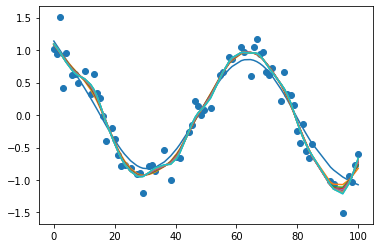

In [0]:
#!pip install csaps
import csaps

def mse(preds, real):
  subs = np.subtract(real, preds)
  pows = np.power(subs, 2.0)

  return np.mean(pows)

plt.scatter(data_train.x, data_train.y)

ss = np.arange(0.001, 0.1, 0.01)
errors = []

for s in ss:
  model = csaps.UnivariateCubicSmoothingSpline(data_train.x, data_train.y, smooth=s)
  pred_ys = model(data_test.x)

  plt.plot(data_train.x, model(data_train.x))

  error = mse(pred_ys, data_test.y)
  errors.append(error)

       s     error
0  0.001  0.059927
1  0.011  0.054010
2  0.021  0.057149
3  0.031  0.059025
4  0.041  0.060377
5  0.051  0.061470
6  0.061  0.062413
7  0.071  0.063259
8  0.081  0.064038
9  0.091  0.064765


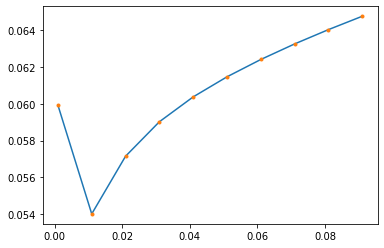

In [0]:
errors_data = pd.DataFrame({
    "s": ss,
    "error": errors
})

print(errors_data)

plt.plot(ss, errors, '-', ss, errors, '.')
plt.show()